In [1]:
""" 
    equation
"""

' \n    equation\n'

In [2]:
from dolfin import *
from mshr import *
import matplotlib.pyplot as plt
import numpy as np
import random

In [3]:
# ==========================================
# parameters

# ------------------------------------------
# mesh
xmin = 0.0
xmax = 1.0
nel = 10000
p_order = 2

# ------------------------------------------
# material system (nondimensional)
d_NonDim = 0.15 # d/H
wl_NonDim = 0.02  # lambda/H
fe_NonDim = 0.001  # lambda*tao/k

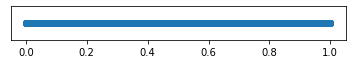

In [4]:
# ==========================================
# mesh
mesh = IntervalMesh(nel, xmin, xmax)

plot(mesh)

class Left(SubDomain):
    def inside(self, x, on_boundary):
        return near(x[0], xmin, 1.e-14) and on_boundary
class Right(SubDomain):
    def inside(self, x, on_boundary):
        return near(x[0], xmax, 1.e-14) and on_boundary

    

In [5]:
# =========================================
# function space
V1D = FiniteElement('CG',mesh.ufl_cell(),p_order)
# u1 and u2 for the bot and top layers
V   = FunctionSpace(mesh,V1D)

In [6]:
# This imposes a Dirichlet condition at the point x=0
def Dirichlet_x0_boundary(x,on_boundary):
    tol = 1e-14
    return abs(x[0]-xmin)<tol

# This imposes a Dirichlet condition at the point x=1
def Dirichlet_x1_boundary(x,on_boundary):
    tol = 1e-14
    return abs(x[0]-xmax)<tol

In [7]:
# Enforce u1=0,u2=0 at x=0
#         u1=d      at x=1
# ---------------------------------------
bcs = [DirichletBC(V, Constant(0),        Dirichlet_x0_boundary),
       DirichletBC(V, Constant(d_NonDim), Dirichlet_x1_boundary)]

In [8]:
# weak form
# ---------------------------------------
def strain(v):
    return grad(v)[0]

# Define variational problem
du1 = TestFunction(V)
u1 = Function(V)

# weak form
F = inner(strain(u1),strain(du1))*dx + \
    1/d_NonDim*fe_NonDim/wl_NonDim*sin(2*pi/wl_NonDim*d_NonDim*u1)*du1*dx

J = derivative(F, u1)
problem = NonlinearVariationalProblem(F, u1, bcs, J)
solver  = NonlinearVariationalSolver(problem)


Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.


In [9]:
solver.solve()

(5, True)

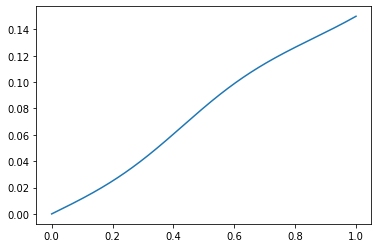

In [10]:
# check
# ------------------------------
plt.figure()
plot(u1)

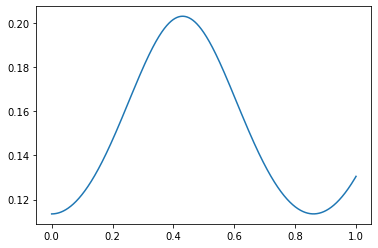

In [11]:
# check
# ------------------------------
plt.figure()
plot(strain(u1))